# Basic NLP with Python and NLTK

- Bruni Francesco (@brunifrancesco)
- This notebook @ https://github.com/brunifrancesco/nltk_base.git

# Python

- Programming language
- Multi-pradigm
- Easy to learn
- Suitable for multiple needs
- Multiple implementations, a ton of useful libraries

## Few Python data structures

In [32]:
import random
a_number = 1
a_string = "Python rocks!"
a_list = ["1", "2", "3"]
a_dict = {"film":"Pulp fiction", "francesco": "Python"}
print(a_dict.values())
a_dict_of_list = {"key":["Carlito's way","The godfather"], "francesco":1}
print(len(a_dict_of_list["key"]))
a_tuple = ("Goodfellas", "Kill Bill",)
a_list.append(4)
print(a_list)
a_set = set(("Inglourious Basterds", "The Good, the Bad, the Ugly"))
another_list = [element^2 for element in range(0, 10)]
assert another_list == list(map(lambda item: item^2, range(0,10)))
a_generator = (element**2 for element in range(0, 10))
print(type(a_generator))
print(type(another_list))
print(type(a_tuple))

dict_values(['Pulp fiction', 'Python'])
2
['1', '2', '3', 4]
<class 'generator'>
<class 'list'>
<class 'tuple'>


## Creating functions

In [43]:
def super_function(number):
    return number * 2 

d = [
    [1,2,3],
    [1,3,4]
]

print(list(map(lambda item: sum(item), zip(d[0], d[1]))))

def factorial(n):
    if n == 0: return 1
    else: return n*factorial(n-1)

double = lambda item: item * 2
predicate = lambda item: item > 3

assert super_function(3) == 6
assert factorial(3) == 6
assert double(3) == 6
assert list(filter(predicate, [1,2,5,3])) == [5]

[2, 5, 7]


## And much more..

- Object oriented paradigm --> classes, metaclasses etc. etc.
- Functional programming paradigm --> partials, closures, high order functions etc. etc.
- Scripting paradigm --> shell control, os related functions etc. etc.
- Async ops support --> asyncio



## Reading files

In [74]:
with open("file", "r") as input:
    data = input.read()

import csv
def read_csv():
    with open('data.csv', 'r') as francesco:
        data = csv.reader(francesco, delimiter=';')
        for element in data:
            print(element[1])
read_csv()

Pulp fiction
 Carlito's way
Goodfellas
Kill Bill
The godfather


## Make data talk

In [56]:
from collections import Counter
import statistics

splitted_chunks = data.split()
print("Data lenght: %s" %len(data))
print("Chunks numbers: %s" %len(splitted_chunks))
print("Unique chunks: %s" %len(set(splitted_chunks)))
print("Avg lenght of chunks: %s" %statistics.mean(map(len, splitted_chunks)))
print("Std dev lenght of chunks: %s" %statistics.pstdev(map(len, splitted_chunks)))
print("Frequency distribution: %s" %sorted(filter(lambda item: item[1] > 5, Counter(splitted_chunks).items()), key=lambda item: item[1]))

Data lenght: 6147
Chunks numbers: 947
Unique chunks: 532
Avg lenght of chunks: 5.4730728616684265
Std dev lenght of chunks: 3.4316471362237766
Frequency distribution: [('M5s', 6), ('Parlamento', 6), ('al', 9), ('ha', 9), ('è', 9), ('della', 10), ('non', 10), ('un', 10), ('legge', 11), ('alla', 11), ('le', 12), ('per', 12), ('una', 13), ('del', 14), ('e', 15), ('in', 16), ('-', 17), ('che', 18), ('la', 19), ('a', 20), ('il', 26), ('di', 31)]


# NLTK

- tokenization
- stemming
- tagging 
- parsing
- semantic reasoning
- classification

## Tokenizing

In [60]:
from nltk import word_tokenize
tokens = word_tokenize(data)
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer(strip_handles=True)
s1 = '@remy: This is waaaaayyyy too much for you!!!!!!'
tw_tokens = tokenizer.tokenize(s1)
print(tw_tokens)

[':', 'This', 'is', 'waaaaayyyy', 'too', 'much', 'for', 'you', '!', '!', '!']


## Frequency distribution

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


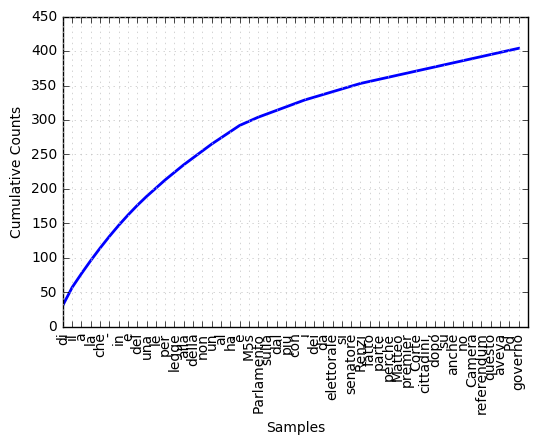

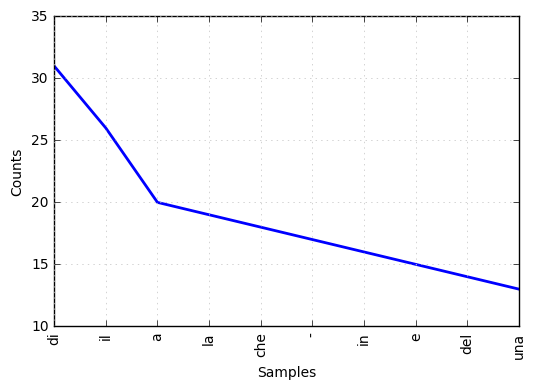

Max frequency key: di
Occurrencies of 'Parlamento': 6
Frequency of 'Parlamento': 0.006335797254487857


In [61]:
from nltk.book import FreqDist
fdist1 = FreqDist(splitted_chunks)
most_common = fdist1.most_common(50)
fdist1.plot(50, cumulative=True)
fdist1.plot(10)
print("Max frequency key: %s" %fdist1.max())
print("Occurrencies of 'Parlamento': %s" %fdist1["Parlamento"])
print("Frequency of 'Parlamento': %s"%fdist1.freq('Parlamento'))

## Cleaning data

In [119]:
from nltk.corpus import stopwords

def remove_stopword(word):
    return word not in words

import string
words = stopwords.words('italian')
#words.append("legge")
lowered_chunks = list(map(lambda item: item.lower(), splitted_chunks))
print("Chunks lenght %s" %len(lowered_chunks))
clean_chunks = list(filter(remove_stopword, splitted_chunks))
print("Cleaned chunks (without stopwords) lenght: %s" %len(clean_chunks))
clean_chunks = list(filter(lambda chunk: chunk not in string.punctuation, clean_chunks))
print("Cleaned chunks (without punctuation and stopwords) lenght: %s" %len(clean_chunks))

from nltk.book import FreqDist
fdist1 = FreqDist(clean_chunks)
most_common = fdist1.most_common(50)

Chunks lenght 947
Cleaned chunks (without stopwords) lenght: 587
Cleaned chunks (without punctuation and stopwords) lenght: 569


## Stemming

In [120]:
from nltk.stem.porter import *
from nltk.stem.snowball import *
stemmer = PorterStemmer()

stemmer.stem("activities")


available_langs = SnowballStemmer.languages

sn_stemmer = SnowballStemmer("spanish", ignore_stopwords=True)
print(sn_stemmer.stem("ordenador"))

from nltk.stem.lancaster import *
LancasterStemmer().stem("activities")

orden


'act'

## And much more..

- Ngrams finder
- Classifying data

## Custom ngrams finder

In [121]:
def find_and_analyze_ngrams(tagged_sent):
    chunker = RegexpParser(CHUNK_RULE)
    tree = chunker.parse(tagged_sent)
    ngrams = []
    for item in self.__leaves(tree):
        if not item == tagged_sent:
            probable_ngram = ' '.join(self.__stemmer.stem(
                word.lower()) for (word, pos) in item
            )
            if self.__evaluate_polarity_ngram(probable_ngram):
                ngrams.append(probable_ngram)
    return ngrams

## Classifying data

In [122]:
def __get_elements_for_classification(self, lfeats, train_number, classifying=True):
    train_feats = []
    test_feats = []
    for label, feats in lfeats.iteritems():
        if classifying:
            train_feats.extend([(feat, label) for feat in feats])
        else:
            cutoff = train_number * len(feats)/10
            train_feats.extend([(feat, label) for feat in feats[:cutoff]])
            test_feats.extend([(feat, label) for feat in feats[cutoff:]])

    nb_classifier = NaiveBayesClassifier.train(train_feats)
    return train_feats, test_feats, nb_classifier

## Useful resources

- https://github.com/nltk/nltk/tree/develop/nltk/test
- http://www.nltk.org/
- http://python.org